In [1]:
import sys
import os

sys.path.append("/home/users/annava/projects/HHbbVV/src/HHbbVV/postprocessing/")
from collections import OrderedDict
import utils
import postprocessing
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
import numpy as np
import pickle
import os
import json

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})

In [2]:
nonres_samples = OrderedDict(
    [
        ("HHbbVV", "GluGluToHHTobbVV_node_cHHH1"),
        ("ggHH_kl_2p45_kt_1_HHbbVV", "GluGluToHHTobbVV_node_cHHH2p45"),
        ("ggHH_kl_5_kt_1_HHbbVV", "GluGluToHHTobbVV_node_cHHH5"),
        ("ggHH_kl_0_kt_1_HHbbVV", "GluGluToHHTobbVV_node_cHHH0"),
        ("qqHH_CV_1_C2V_1_kl_1_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_1_C3_1"),
        ("VBFHHbbVV", "VBF_HHTobbVV_CV_1_C2V_1_C3_1"),
        ("qqHH_CV_1_C2V_0_kl_1_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_0_C3_1"),
        ("qqHH_CV_1p5_C2V_1_kl_1_HHbbVV", "VBF_HHTobbVV_CV_1_5_C2V_1_C3_1"),
        ("qqHH_CV_1_C2V_1_kl_2_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_1_C3_2"),
        ("qqHH_CV_1_C2V_2_kl_1_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_2_C3_1"),
        ("qqHH_CV_1_C2V_1_kl_0_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_1_C3_0"),
        ("qqHH_CV_0p5_C2V_1_kl_1_HHbbVV", "VBF_HHTobbVV_CV_0_5_C2V_1_C3_1"),
    ]
)

samples = OrderedDict(
    [
        ("QCD", "QCD"),
        ("TT", "TT"),
        ("ST", "ST"),
        ("V+Jets", ("WJets", "ZJets")),
        ("Diboson", ("WW", "WZ", "ZZ")),
        # TODO: break this down into production modes for combination!!!!
        # https://gitlab.cern.ch/hh/naming-conventions#single-h-backgrounds
        ("Hbb", "*HToBB"),
        ("HWW", ("*HToWW", "*HToNonbb")),
        ("HH", ("GluGluToHHTo4B_node_cHHH1_preUL")),
        ("Data", "JetHT"),
    ]
)

samples2 = OrderedDict(
    [
        ("QCD", "QCD"),
        ("TT", "TT"),
        ("ST", "ST"),
        ("V+Jets", ("WJets", "ZJets")),
        ("Diboson", ("WW", "WZ", "ZZ")),
        # TODO: break this down into production modes for combination!!!!
        # https://gitlab.cern.ch/hh/naming-conventions#single-h-backgrounds
        ("Hbb", "*HToBB"),
        ("HWW", ("*HToWW", "*HToNonbb")),
        ("VBFHHbbVV", "VBF_HHTobbVV_CV_1_C2V_1_C3_1"),
        ("Data", "JetHT"),
        ("qqHH_CV_1_C2V_0_kl_1_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_0_C3_1"),
        ("qqHH_CV_1p5_C2V_1_kl_1_HHbbVV", "VBF_HHTobbVV_CV_1_5_C2V_1_C3_1"),
        ("qqHH_CV_1_C2V_1_kl_2_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_1_C3_2"),
        ("qqHH_CV_1_C2V_2_kl_1_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_2_C3_1"),
        ("qqHH_CV_1_C2V_1_kl_0_HHbbVV", "VBF_HHTobbVV_CV_1_C2V_1_C3_0"),
        ("qqHH_CV_0p5_C2V_1_kl_1_HHbbVV", "VBF_HHTobbVV_CV_0_5_C2V_1_C3_1"),
    ]
)


single_dataset_test = {"VBFHHbbVV": "VBF_HHTobbVV_CV_1_C2V_1_C3_1"}
events_dict = utils.load_samples(
    data_dir="/home/users/annava/projects/HHbbVV/src/HHbbVV/VBF_binder/data/",
    samples=samples2,
    year="2017",
)
postprocessing.apply_weights(events_dict, year="2017", cutflow=None, qcd_sf=False)

Loaded QCD_HT1000to1500                                  : 99707 entries
Loaded QCD_HT100to200                                    : 0 entries
Loaded QCD_HT1500to2000                                  : 97046 entries
Loaded QCD_HT2000toInf                                   : 54163 entries
Loaded QCD_HT200to300                                    : 0 entries
Loaded QCD_HT300to500                                    : 15 entries
Loaded QCD_HT500to700                                    : 16528 entries
Loaded QCD_HT50to100                                     : 0 entries
Loaded QCD_HT700to1000                                   : 147887 entries
Loaded TTJets                                            : 707549 entries
Loaded TTTo2L2Nu                                         : 252978 entries
Loaded TTToHadronic                                      : 753667 entries
Loaded TTToSemiLeptonic                                  : 535548 entries
Loaded TT_MTT1000ToInf                                   : 20

In [54]:
print(events_dict["QCD"].columns.tolist())
print(events_dict.keys())
print(events_dict["QCD"][("ak8FatJetParticleNetMass", 0)])

[('vbfpt', 0), ('vbfpt', 1), ('vbfeta', 0), ('vbfeta', 1), ('vbfphi', 0), ('vbfphi', 1), ('vbfM', 0), ('vbfM', 1), ('nGoodVBFJets', 0), ('vbf_dR_HH', 0), ('vbf_dR_j0_HVV', 0), ('vbf_dR_j1_HVV', 0), ('vbf_dR_j0_Hbb', 0), ('vbf_dR_j1_Hbb', 0), ('vbf_dR_jj', 0), ('vbf_Mass_jj', 0), ('vbf_dEta_jj', 0), ('vbf_cos_j1', 0), ('vbf_cos_j2', 0), ('vbf_prod_centrality', 0), ('ak8FatJetEta', 0), ('ak8FatJetEta', 1), ('ak8FatJetPhi', 0), ('ak8FatJetPhi', 1), ('ak8FatJetMass', 0), ('ak8FatJetMass', 1), ('ak8FatJetPt', 0), ('ak8FatJetPt', 1), ('ak8FatJetMsd', 0), ('ak8FatJetMsd', 1), ('ak8FatJetParticleNetMD_QCD', 0), ('ak8FatJetParticleNetMD_QCD', 1), ('ak8FatJetParticleNetMD_Xbb', 0), ('ak8FatJetParticleNetMD_Xbb', 1), ('ak8FatJetParticleNet_Th4q', 0), ('ak8FatJetParticleNet_Th4q', 1), ('ak8FatJetParticleNetMass', 0), ('ak8FatJetParticleNetMass', 1), ('ak8FatJetPt_JES_up', 0), ('ak8FatJetPt_JES_up', 1), ('ak8FatJetPt_JES_down', 0), ('ak8FatJetPt_JES_down', 1), ('ak8FatJetPt_JER_up', 0), ('ak8FatJet

In [3]:
# Computes appropriate scale factor for each signal file
def compute_individual_scale_factors(events_dict, S_list):
    total_background_weight = 0

    # Calculate the total background weight
    for dataset, dataframe in events_dict.items():
        if dataset not in S_list:
            total_weight = np.sum(dataframe["finalWeight"])
            total_background_weight += total_weight

    # Calculate individual scale factors for each signal dataset
    scale_factors = []
    for dataset in S_list:
        total_signal_weight = np.sum(events_dict[dataset]["finalWeight"])

        if total_signal_weight == 0:
            scale_factor = 0
        else:
            scale_factor = total_background_weight / total_signal_weight / 10
            n = np.floor(np.log10(scale_factor))  # Find the order of magnitude
            scale_factor = 10 ** (n + 1) if scale_factor >= 10**n * 5 else 10**n

        scale_factors.append(scale_factor)

    return scale_factors

Plotting Histograms

/tmp/ipykernel_3165608/480375688.py:91: RuntimeWarning: invalid value encountered in divide
  significance = np.where(hist_background > 0, hist_signal / np.sqrt(hist_background) / sf, 0)


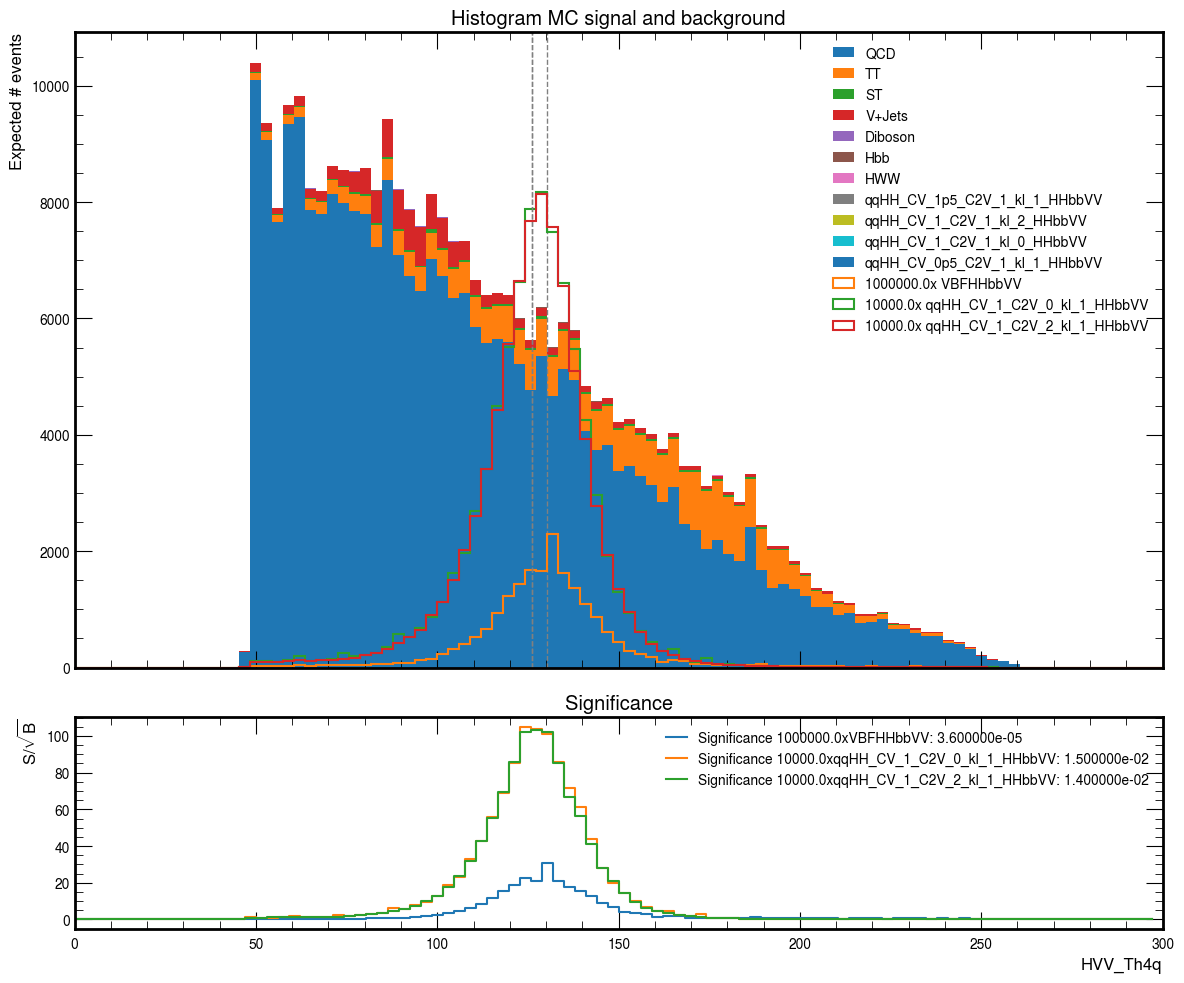

Significance for VBFHHbbVV: 3.5885779421283814e-05 0.020142884066339732 315063.8238309898
Significance for qqHH_CV_1_C2V_0_kl_1_HHbbVV: 0.014561544116854447 8.173474275961464 315063.8238309898
Significance for qqHH_CV_1_C2V_2_kl_1_HHbbVV: 0.014248468107281411 7.997743001164582 315063.8238309898


[3.5885779421283814e-05, 0.014561544116854447, 0.014248468107281411]

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def plot_cut_histogram(
    combined_data,
    S_list,
    signal_sf,
    xlabel,
    column_name,
    xrange,
    title="Histogram MC signal and background",
    cuts={},
):
    jj_mass_cut = cuts.get("jj_mass_cut", 500)
    jj_eta_cut = cuts.get("jj_eta_cut", 4.0)
    j_eta_cut = cuts.get("j_eta_cut", 1.5)
    Hbb_Txbb_cut = cuts.get("Hbb_Txbb_cut", 0.8)
    HVV_Th4q_cut = cuts.get("HVV_Th4q_cut", 0.0)

    signal_data = []
    signal_weights = []
    background_data = []
    background_weights = []
    background_labels = []

    for dataset, dataframe in combined_data.items():
        # Computing variables of interest and masks based on them
        Hbb_mask = (
            dataframe[("ak8FatJetParticleNetMD_Txbb", 0)]
            > dataframe[("ak8FatJetParticleNetMD_Txbb", 1)]
        )
        Hbb_Txbb_values = np.where(
            Hbb_mask,
            dataframe[("ak8FatJetParticleNetMD_Txbb", 0)],
            dataframe[("ak8FatJetParticleNetMD_Txbb", 1)],
        )
        HVV_Th4q_values = np.where(
            ~Hbb_mask,
            dataframe[("ak8FatJetParticleNet_Th4q", 0)],
            dataframe[("ak8FatJetParticleNet_Th4q", 1)],
        )

        mask = (
            (dataframe[("nGoodMuons", 0)] == 0)
            & (dataframe[("nGoodElectrons", 0)] == 0)
            & (dataframe[("nGoodVBFJets", 0)] >= 2)
            & (dataframe[("nGoodJets", 0)] == 0)
            & (dataframe[("vbf_Mass_jj", 0)] > jj_mass_cut)
            & (dataframe[("vbf_dEta_jj", 0)] > jj_eta_cut)
            & (np.abs(dataframe[("vbfeta", 0)]) > j_eta_cut)
            & (np.abs(dataframe[("vbfeta", 1)]) > j_eta_cut)
            & (Hbb_Txbb_values >= Hbb_Txbb_cut)
            & (HVV_Th4q_values >= HVV_Th4q_cut)
        )
        # column_data = df[('bbFatJetPtOverDijetPt', 0)].values * df[('DijetPt', 0)].values
        # Mass: ('ak8FatJetMass', 0), ('ak8FatJetMass', 1) or ('ak8FatJetParticleNetMass', 0), ('ak8FatJetParticleNetMass', 1)
        df = dataframe[mask]
        if column_name == "mass":
            column_data = np.where(
                Hbb_mask,
                dataframe[("ak8FatJetParticleNetMass", 0)],
                dataframe[("ak8FatJetParticleNetMass", 1)],
            )
            column_data = column_data[mask]
        elif column_name == "Hbb_Txbb":
            column_data = Hbb_Txbb_values
            column_data = column_data[mask]
        elif column_name == "HVV_Th4q":
            column_data = HVV_Th4q_values
            column_data = column_data[mask]
        else:
            column_data = df[column_name].values

        total_weight = df["finalWeight"]

        if dataset in S_list:
            i = S_list.index(dataset)
            column_weights = signal_sf[i] * total_weight
            signal_data.append(column_data)
            signal_weights.append(column_weights)
        else:
            column_weights = total_weight
            background_data.append(column_data)
            background_weights.append(column_weights)
            background_labels.append(dataset)

    fig, ax = plt.subplots(
        2, 1, figsize=(12, 10), gridspec_kw={"height_ratios": [3, 1]}, sharex=True
    )
    bins = np.linspace(xrange[0], xrange[1], 100)

    ax[0].hist(
        background_data,
        bins=bins,
        weights=background_weights,
        stacked=True,
        label=background_labels,
    )

    for data, weight, label, sf in zip(signal_data, signal_weights, S_list, signal_sf):
        if np.sum(weight) > 0:
            mean_value = np.average(data, weights=weight)
            ax[0].axvline(mean_value, color="grey", linestyle="--", linewidth=1)
            ax[0].hist(
                data,
                bins=bins,
                weights=weight,
                histtype="step",
                label=f"{sf}x {label}",
                linewidth=1.5,
            )

    ax[0].set_ylabel("Expected # events")
    ax[0].set_title(title)
    ax[0].legend()

    # Calculating and plotting significance for each signal dataset
    for data, weight, label, sf in zip(signal_data, signal_weights, S_list, signal_sf):
        hist_signal, _ = np.histogram(data, bins=bins, weights=weight)
        hist_background, bins = np.histogram(
            np.concatenate(background_data), bins=bins, weights=np.concatenate(background_weights)
        )
        significance = np.where(hist_background > 0, hist_signal / np.sqrt(hist_background) / sf, 0)
        # Calculate overall significance and round to two significant figures
        overall_significance = (
            np.sum(weight) / sf / np.sqrt(np.sum(np.concatenate(background_weights)))
        )
        n = np.floor(np.log10(overall_significance))
        overall_significance = np.round(overall_significance, -int(n - 1))

        # Convert to scientific notation
        overall_significance_sci = "{:e}".format(overall_significance)
        ax[1].step(
            bins[:-1],
            sf * significance,
            where="mid",
            label=f"Significance {sf}x{label}: {overall_significance_sci}",
        )

    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel("$S / \sqrt{B}$")
    ax[1].set_title("Significance")
    ax[1].legend()

    ax[0].set_xlim(xrange)
    ax[1].set_xlim(xrange)

    plt.tight_layout()
    plt.show()

    # Print out the individual significance
    significances = []
    for data, weight, label, sf in zip(signal_data, signal_weights, S_list, signal_sf):
        S = np.sum(weight) / sf
        B = np.sum(np.concatenate(background_weights))
        print(f"Significance for {label}: {S/np.sqrt(B)} {S} {B}")
        significances.append(S / np.sqrt(B))

    return significances


S_list = ["VBFHHbbVV", "qqHH_CV_1_C2V_0_kl_1_HHbbVV", "qqHH_CV_1_C2V_2_kl_1_HHbbVV"]
scale_factors = compute_individual_scale_factors(
    events_dict, S_list
)  # notice that scale factor is based on pre-cuts (thus we can still compare visually)
xlabel = "Hbb ParNet $M$ (GeV)"
cuts = {
    "jj_mass_cut": 0,
    "jj_eta_cut": 3.5,
    "j_eta_cut": 1,
    "Hbb_Txbb_cut": 0.95,
    "HVV_Th4q_cut": 0.9,
}
cuts = {"jj_mass_cut": 0, "jj_eta_cut": 0, "j_eta_cut": 0, "Hbb_Txbb_cut": 0, "HVV_Th4q_cut": 0}
plot_cut_histogram(
    events_dict,
    S_list=S_list,
    signal_sf=scale_factors,
    xlabel="HVV_Th4q",
    column_name="mass",
    xrange=[0, 300],
    cuts=cuts,
)

/tmp/ipykernel_2828310/797447943.py:91: RuntimeWarning: invalid value encountered in divide
  significance = np.where(hist_background > 0, hist_signal / np.sqrt(hist_background) / sf, 0)


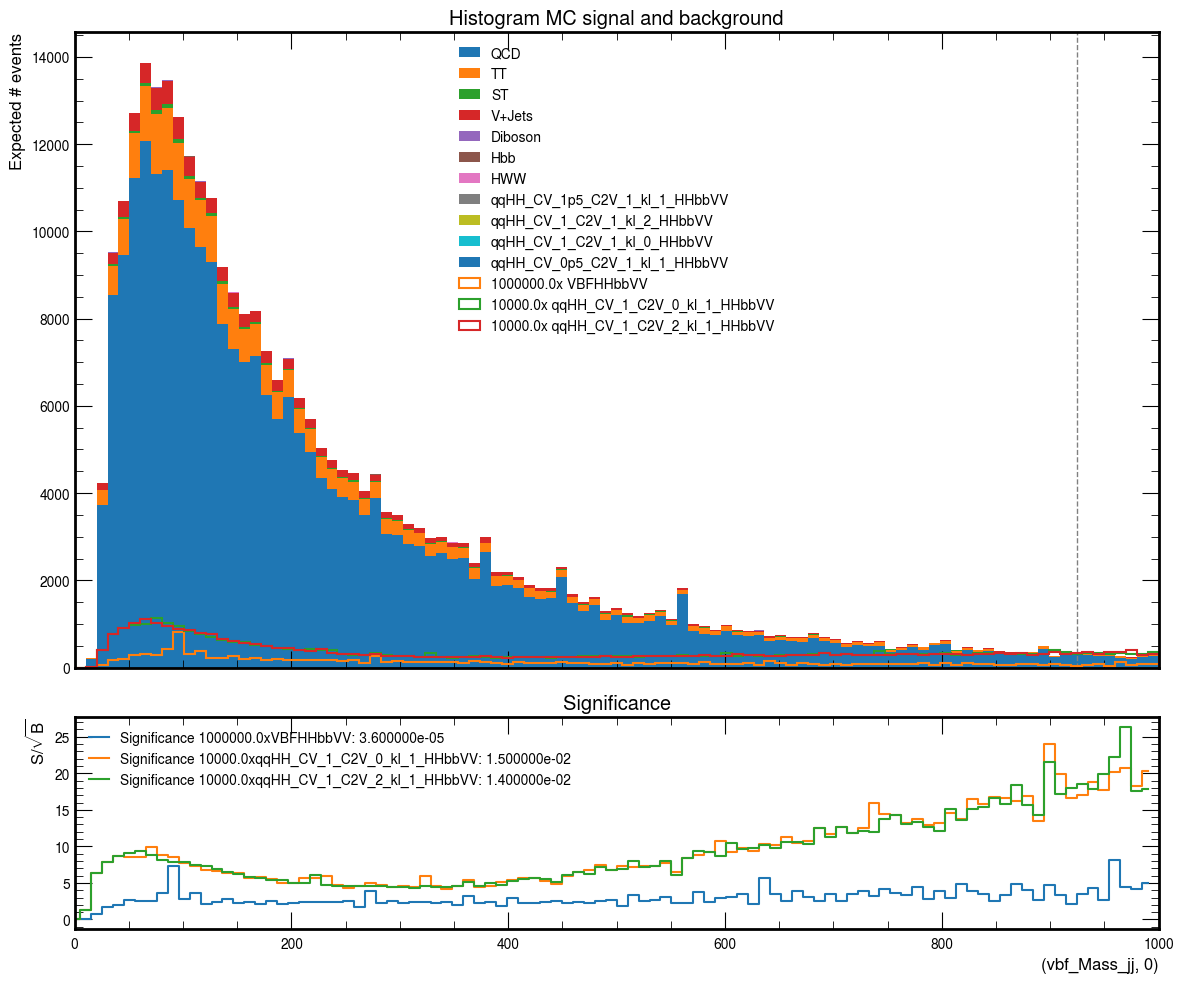

Significance for VBFHHbbVV: 3.5885779421283814e-05
Significance for qqHH_CV_1_C2V_0_kl_1_HHbbVV: 0.014561544116854447
Significance for qqHH_CV_1_C2V_2_kl_1_HHbbVV: 0.014248468107281411


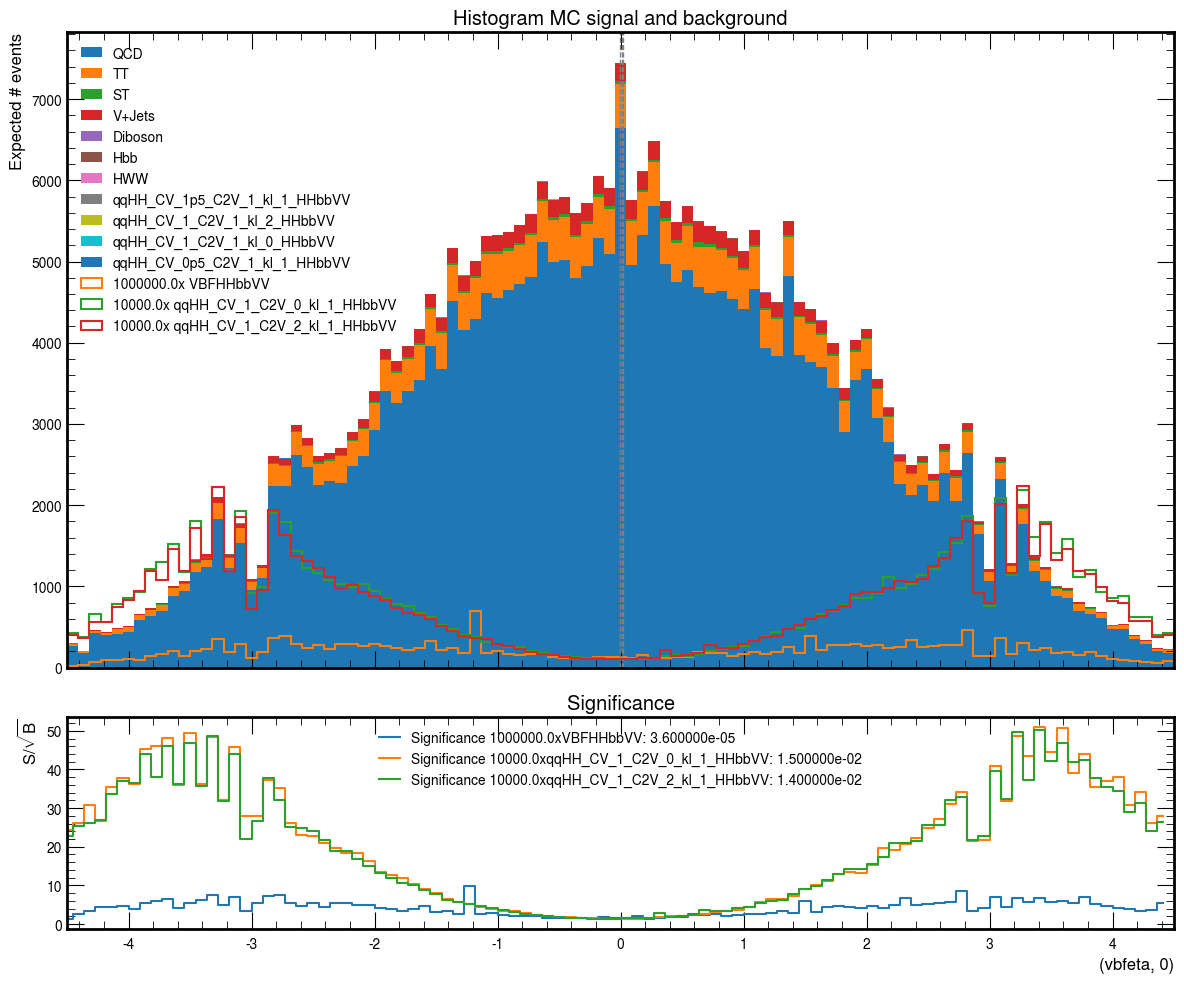

Significance for VBFHHbbVV: 3.5885779421283814e-05
Significance for qqHH_CV_1_C2V_0_kl_1_HHbbVV: 0.014561544116854447
Significance for qqHH_CV_1_C2V_2_kl_1_HHbbVV: 0.014248468107281411


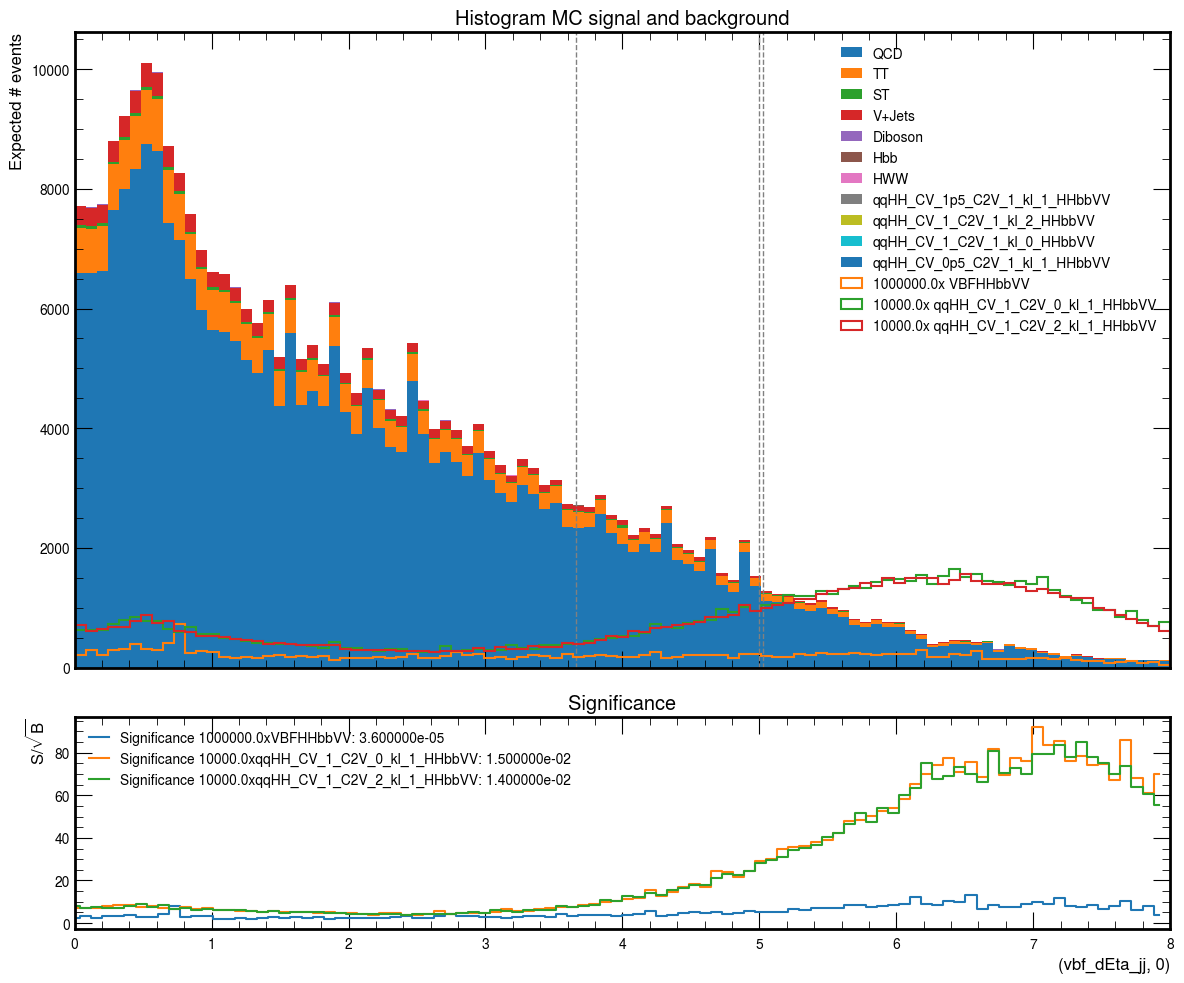

Significance for VBFHHbbVV: 3.5885779421283814e-05
Significance for qqHH_CV_1_C2V_0_kl_1_HHbbVV: 0.014561544116854447
Significance for qqHH_CV_1_C2V_2_kl_1_HHbbVV: 0.014248468107281411


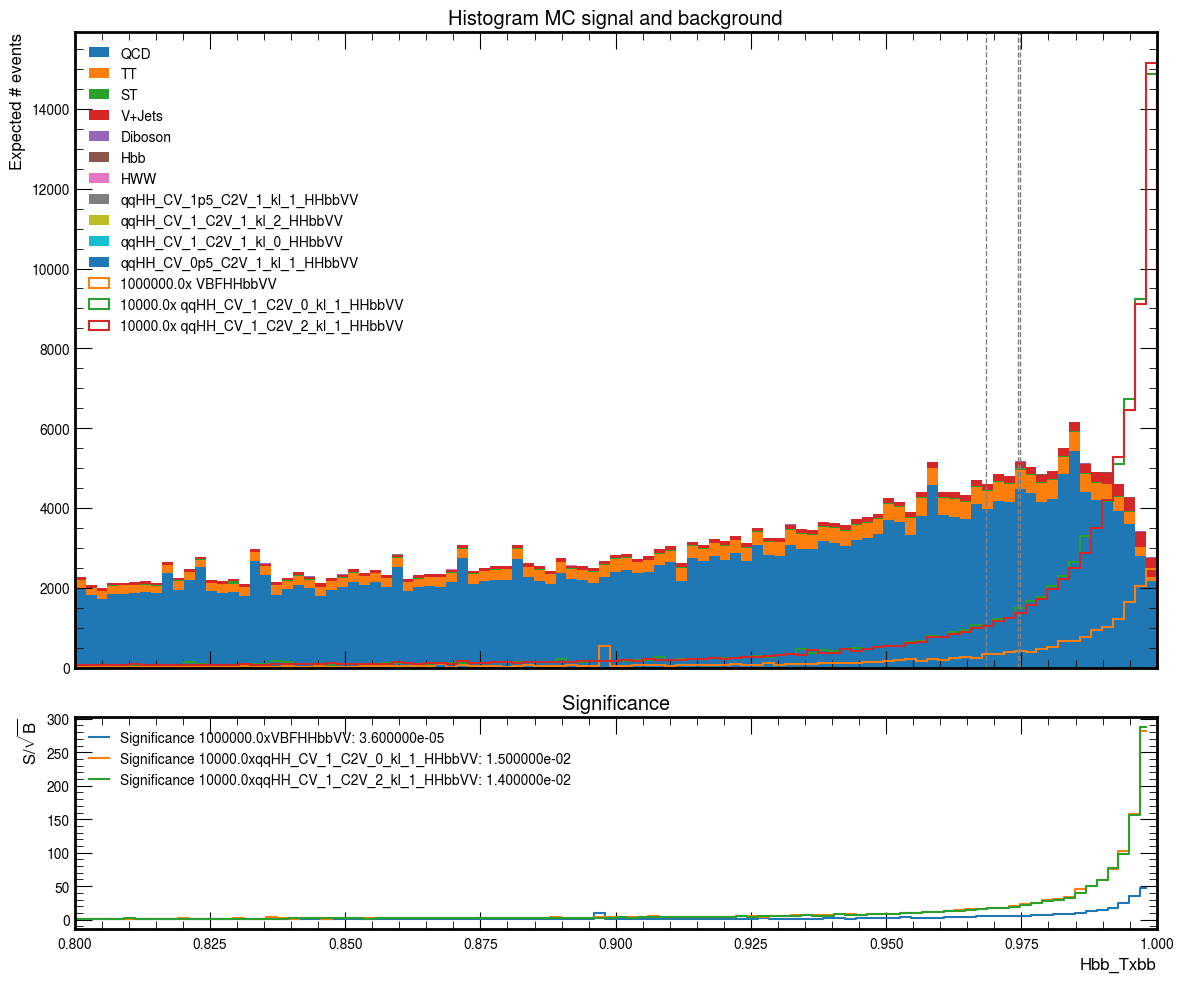

Significance for VBFHHbbVV: 3.5885779421283814e-05
Significance for qqHH_CV_1_C2V_0_kl_1_HHbbVV: 0.014561544116854447
Significance for qqHH_CV_1_C2V_2_kl_1_HHbbVV: 0.014248468107281411


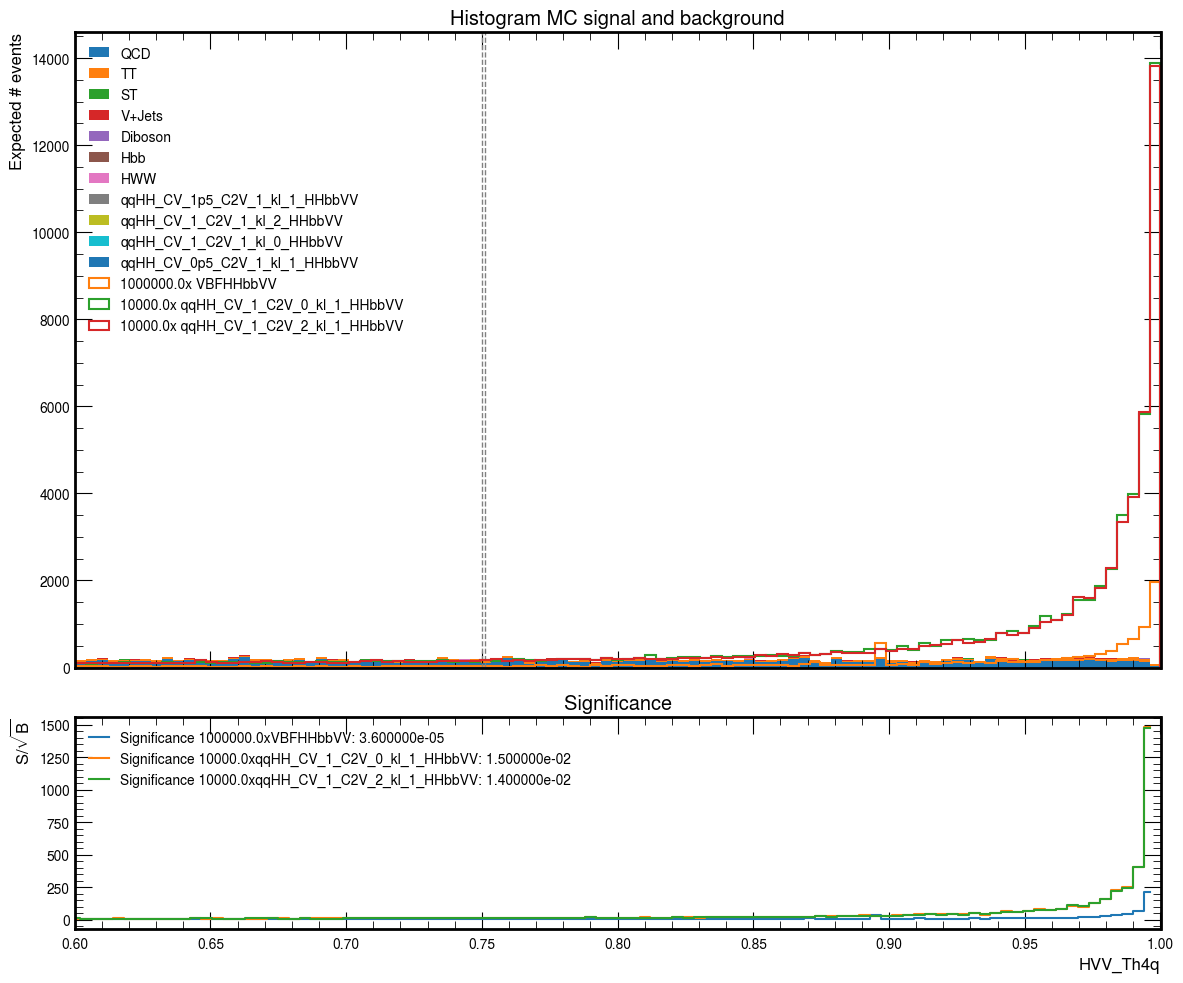

Significance for VBFHHbbVV: 3.5885779421283814e-05
Significance for qqHH_CV_1_C2V_0_kl_1_HHbbVV: 0.014561544116854447
Significance for qqHH_CV_1_C2V_2_kl_1_HHbbVV: 0.014248468107281411


[3.5885779421283814e-05, 0.014561544116854447, 0.014248468107281411]

In [28]:
S_list = ["VBFHHbbVV", "qqHH_CV_1_C2V_0_kl_1_HHbbVV", "qqHH_CV_1_C2V_2_kl_1_HHbbVV"]
xlabel = "VBF-Jet $p_T$ (GeV)"
xlabel = "Hbb Jet $p_T$ (GeV)"
xlabel = "Hbb ParNet $M$ (GeV)"
col_name = ("vbfpt", 0)
scale_factors = compute_individual_scale_factors(
    events_dict, S_list
)  # notice that scale factor is based on pre-cuts (thus we can still compare visually)
cuts = {
    "jj_mass_cut": 500,
    "jj_eta_cut": 4.0,
    "j_eta_cut": 1.5,
    "Hbb_Txbb_cut": 0.95,
    "HVV_Th4q_cut": 0.6,
}
# plot_cut_histogram(events_dict, S_list=S_list, signal_sf=scale_factors, xlabel=xlabel, column_name=col_name,xrange = [0,300],cuts= cuts)
cuts = {
    "jj_mass_cut": 500,
    "jj_eta_cut": 6.0,
    "j_eta_cut": 2.5,
    "Hbb_Txbb_cut": 0.95,
    "HVV_Th4q_cut": 0.6,
}

# plot_cut_histogram(events_dict, S_list=S_list, signal_sf=scale_factors, xlabel=xlabel, column_name=col_name,xrange = [0,300],cuts= cuts)
cuts = {"jj_mass_cut": 0, "jj_eta_cut": 0, "j_eta_cut": 0, "Hbb_Txbb_cut": 0.0, "HVV_Th4q_cut": 0.0}


# plot different cutting variables distributions before cuts to find reasonable values
# (jj_mass_cut = 0 (+ 500) j_eta_cut = 1 (pm 1) jj_eta_cut = 3.5 (pm 1.5) Hbb_Txbb = 0.95 (+ 0.045) Hbb_Txbb = 0.9 (pm 0.09 ) # test out a grid of these in condor_outputs_tests notebook
plot_cut_histogram(
    events_dict,
    S_list=S_list,
    signal_sf=scale_factors,
    xlabel="(vbf_Mass_jj, 0)",
    column_name=("vbf_Mass_jj", 0),
    xrange=[0, 1000],
    cuts=cuts,
)
plot_cut_histogram(
    events_dict,
    S_list=S_list,
    signal_sf=scale_factors,
    xlabel="(vbfeta, 0)",
    column_name=("vbfeta", 0),
    xrange=[-4.5, 4.5],
    cuts=cuts,
)
plot_cut_histogram(
    events_dict,
    S_list=S_list,
    signal_sf=scale_factors,
    xlabel="(vbf_dEta_jj, 0)",
    column_name=("vbf_dEta_jj", 0),
    xrange=[0, 8],
    cuts=cuts,
)
plot_cut_histogram(
    events_dict,
    S_list=S_list,
    signal_sf=scale_factors,
    xlabel="Hbb_Txbb",
    column_name="Hbb_Txbb",
    xrange=[0.8, 1],
    cuts=cuts,
)
plot_cut_histogram(
    events_dict,
    S_list=S_list,
    signal_sf=scale_factors,
    xlabel="HVV_Th4q",
    column_name="HVV_Th4q",
    xrange=[0.6, 1],
    cuts=cuts,
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming plot_cut_histogram function is defined as before, with the additional 'title' and 'cuts' parameters
# def plot_cut_histogram(combined_data, S_list, signal_sf, xlabel, column_name, xrange, title='Histogram MC signal and background', cuts={}):

# Dummy combined_data, S_list, signal_sf, xlabel, column_name, and xrange for the example
S_list = ["VBFHHbbVV", "qqHH_CV_1_C2V_0_kl_1_HHbbVV", "qqHH_CV_1_C2V_2_kl_1_HHbbVV"]
xlabel = "Hbb ParNet $M$ (GeV)"
column_name = ("vbfpt", 0)
signal_sf = compute_individual_scale_factors(events_dict, S_list)  #
xrange = [0, 300]  # Replace with your actual x-range

# Define the cut parameters and their linspace ranges
cut_parameters = {
    "jj_mass_cut": np.linspace(0, 600, 5),
    "jj_eta_cut": np.linspace(0, 5.0, 5),
    "j_eta_cut": np.linspace(0, 4.0, 5),
    "Hbb_Txbb_cut": np.linspace(0, 0.99, 5),
    "HVV_Th4q_cut": np.linspace(0, 0.99, 5),
}

# Loop through each cut parameter and its linspace range
for param, values in cut_parameters.items():
    for value in values:
        # Set only the current cut parameter to the linspace value, others to zero
        cuts = {k: 0 for k in cut_parameters.keys()}
        cuts[param] = value

        # Call the plot function
        title = f"Histogram MC Signal and Background, Varying {param} at {value}"
        plot_cut_histogram(events_dict, S_list, signal_sf, xlabel, column_name, xrange, title, cuts)

In [ ]:
# Define the cut parameters and their linspace ranges
cut_parameters = {
    "jj_mass_cut": np.linspace(0, 1000, 20),
    "jj_eta_cut": np.linspace(0, 8.0, 20),
    "j_eta_cut": np.linspace(0, 4.0, 10),
    "Hbb_Txbb_cut": np.linspace(0, 0.99, 20) ** 0.5,
    "HVV_Th4q_cut": np.linspace(0, 0.99, 20) ** 0.5,
}

# To store the significances
all_significances = {}

# Loop through each cut parameter and its linspace range
for param, values in cut_parameters.items():
    all_significances[param] = {}

    for signal in S_list:
        all_significances[param][signal] = []

    for value in values:
        # Set only the current cut parameter to the linspace value, others to zero
        cuts = {k: 0 for k in cut_parameters.keys()}
        cuts[param] = value

        # Call the plot function and get significances
        title = f"Histogram MC Signal and Background, Varying {param} at {value}"
        significances = plot_cut_histogram(
            events_dict, S_list, signal_sf, xlabel, column_name, xrange, title, cuts
        )

        # Store the significances
        for signal, sig in zip(S_list, significances):
            all_significances[param][signal].append(sig)

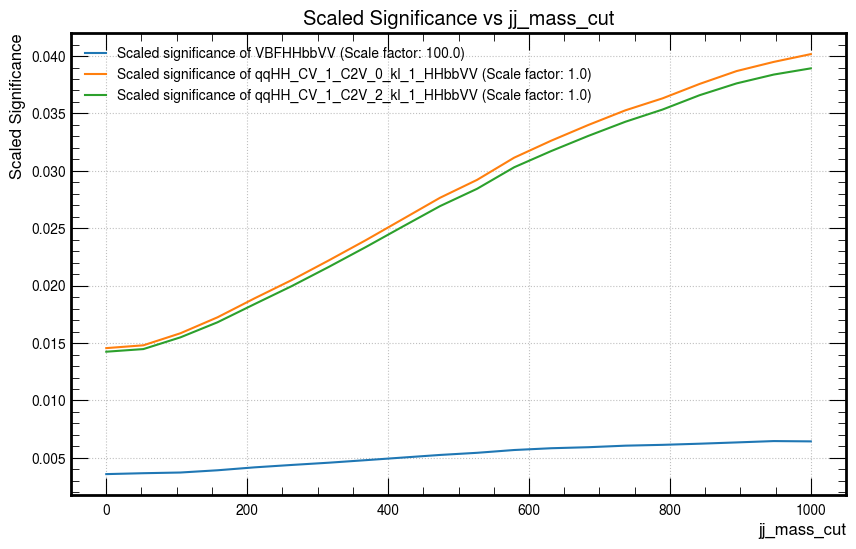

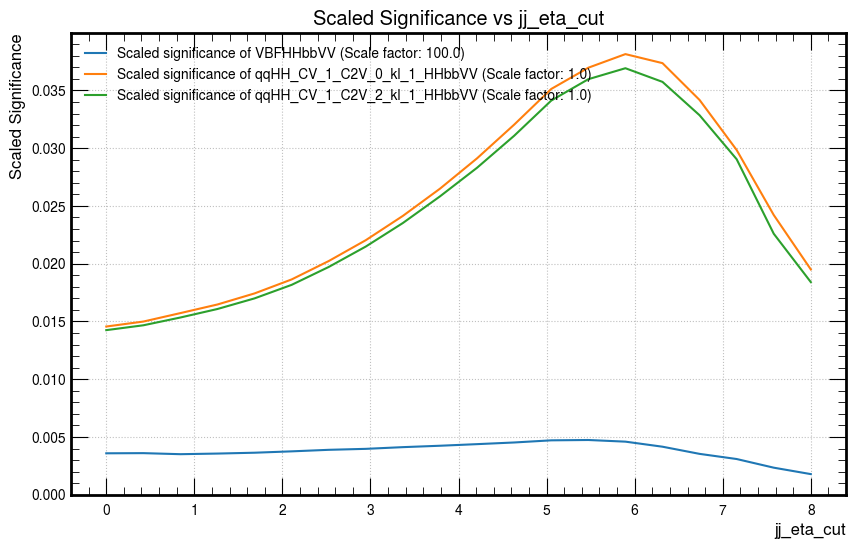

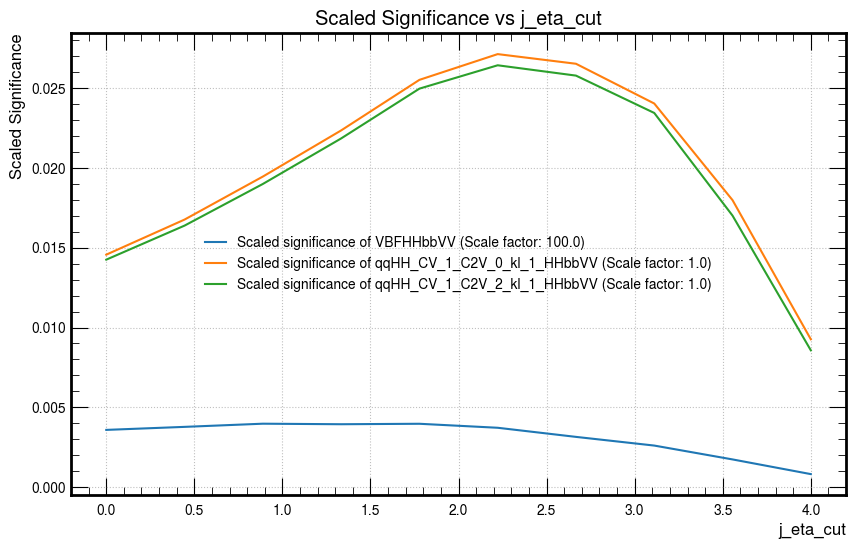

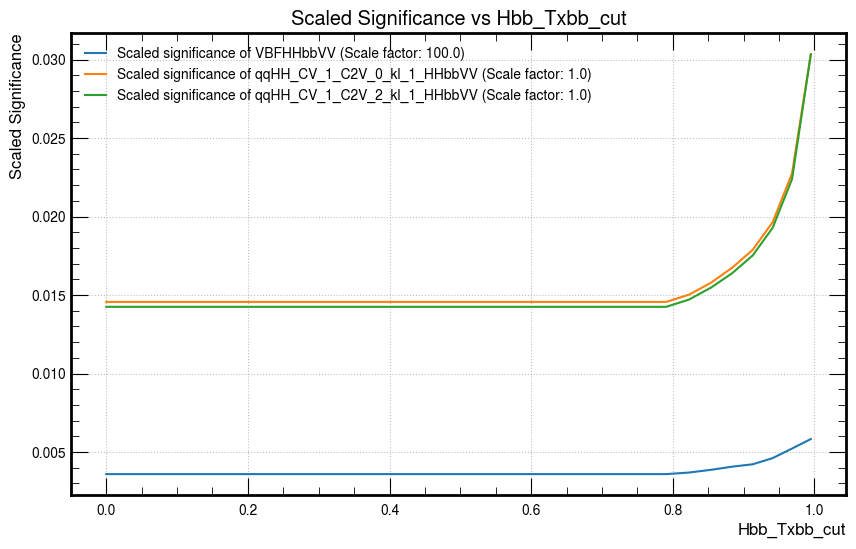

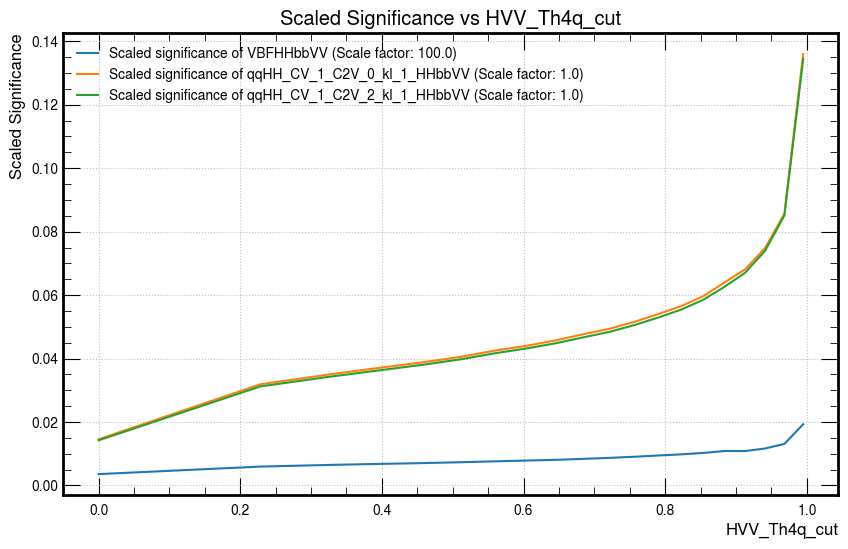

In [85]:
# Function to round to the nearest power of 10
def round_to_nearest_power_of_10(x):
    n = np.floor(np.log10(x))  # Find the order of magnitude
    return 10 ** (n + 1) if x >= 10**n * 5 else 10**n


# Assuming the original scale factors are in signal_sf
min_sf = min(signal_sf)
adjusted_sf = [round_to_nearest_power_of_10(sf / min_sf) for sf in signal_sf]

# Create plots
for param, sig_dict in all_significances.items():
    plt.figure(figsize=(10, 6))
    for i, (signal, sig_values) in enumerate(sig_dict.items()):
        # Scale the significances using the appropriate adjusted scale factor
        sf = adjusted_sf[i]  # Using the adjusted scale factors
        scaled_sig_values = [sig * sf for sig in sig_values]

        # Check to make sure the dimensions match before plotting
        if len(cut_parameters[param]) != len(scaled_sig_values):
            print(f"Dimension mismatch for {signal}. Skipping.")
            continue

        plt.plot(
            cut_parameters[param],
            scaled_sig_values,
            label=f"Scaled significance of {signal} (Scale factor: {sf})",
        )

    plt.xlabel(param)
    plt.ylabel("Scaled Significance")
    plt.title(f"Scaled Significance vs {param}")
    plt.legend()
    plt.grid(True)
    plt.show()